# Hypothesis

We can predict which country will win the FIFA World Cup 2026.

# The Data

This dataset contains detailed information about international soccer matches, focusing on team performance and match outcomes. The data includes records from various tournaments and friendly matches over time, capturing statistics such as team rankings, scores, and specific game attributes.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
# Load dataset
file_path = 'wc_all_matches.csv'  # Update this with the actual path
df = pd.read_csv(file_path)

# Check for null values and data structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          964 non-null    object
 1   year          964 non-null    int64 
 2   host_country  964 non-null    object
 3   stage         964 non-null    object
 4   home_team     964 non-null    object
 5   away_team     964 non-null    object
 6   home_score    964 non-null    int64 
 7   away_score    964 non-null    int64 
 8   winning_team  964 non-null    object
 9   losing_team   964 non-null    object
dtypes: int64(3), object(7)
memory usage: 75.4+ KB
None
         date  year host_country    stage  home_team   away_team  home_score  \
0  07-13-1930  1930      Uruguay  Group 1     France      Mexico           4   
1  07-13-1930  1930      Uruguay  Group 4    Belgium         USA           0   
2  07-14-1930  1930      Uruguay  Group 2     Brazil  Yugoslavia           1   
3  07-14-1930  

In [64]:
wc_all_matches = pd.read_csv('wc_all_matches.csv')  # Adjust the path to your file
wc_results = pd.read_csv('wc_results.csv')  # Adjust the path to your file


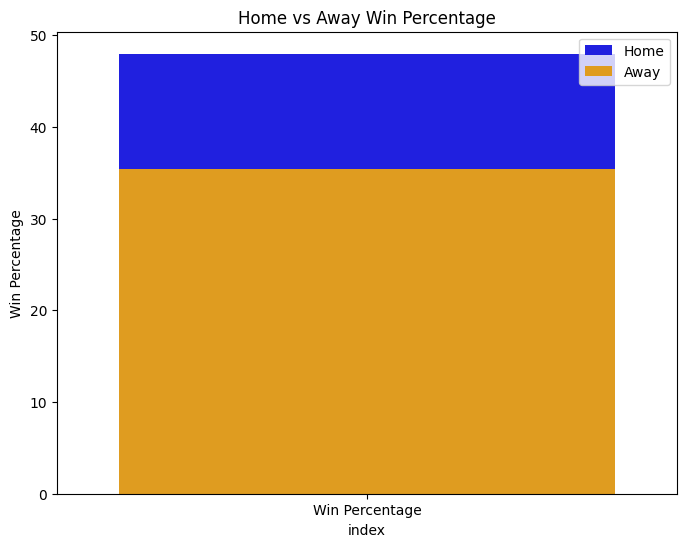

In [65]:
# Home team win percentage
total_home_matches = wc_all_matches['home_team'].value_counts()
home_wins = wc_all_matches[wc_all_matches['home_team'] == wc_all_matches['winning_team']]['home_team'].value_counts()
home_win_percentage = (home_wins / total_home_matches) * 100

# Away team win percentage
total_away_matches = wc_all_matches['away_team'].value_counts()
away_wins = wc_all_matches[wc_all_matches['away_team'] == wc_all_matches['winning_team']]['away_team'].value_counts()
away_win_percentage = (away_wins / total_away_matches) * 100

# Combine data into DataFrame
home_vs_away_df = pd.DataFrame({
    'Home': home_win_percentage.mean(),
    'Away': away_win_percentage.mean()
}, index=['Win Percentage']).reset_index()

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='index', y='Home', data=home_vs_away_df, label='Home', color='blue')
sns.barplot(x='index', y='Away', data=home_vs_away_df, label='Away', color='orange')
plt.title('Home vs Away Win Percentage')
plt.ylabel('Win Percentage')
plt.legend()
plt.show()



/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/2320236144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.head(10).index, y=team_wins.head(10).values, palette='viridis')


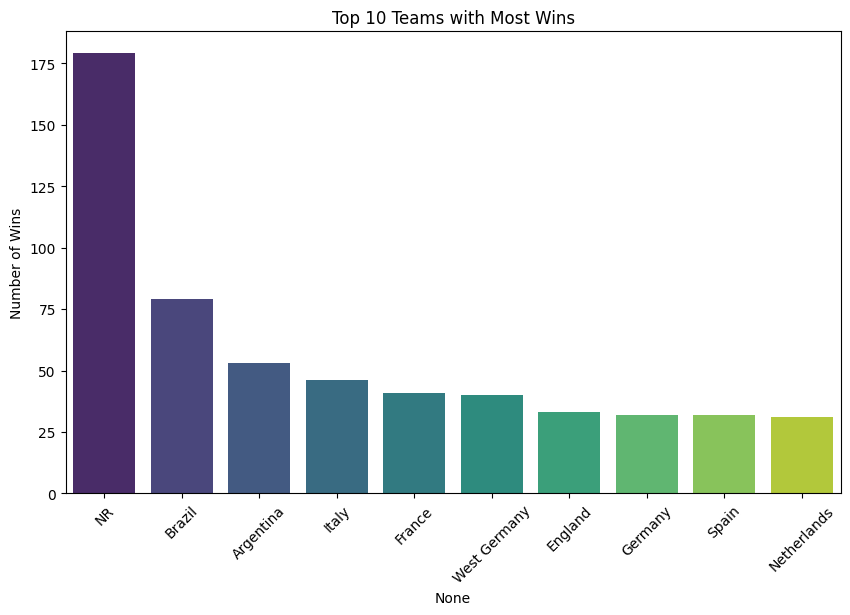

In [66]:

team_wins = wc_all_matches['winning_team'].value_counts()

# Plot the top 10 teams with the most wins using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.head(10).index, y=team_wins.head(10).values, palette='viridis')
plt.title('Top 10 Teams with Most Wins')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/1063488579.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Highest vs Lowest Rank'], y=[win_percentage_high_vs_low], palette='coolwarm')


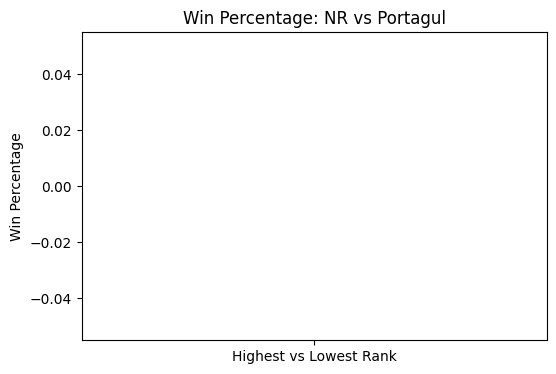

In [67]:
# Calculate team ranks based on wins (assuming higher wins = better ranking)
team_ranks = team_wins.rank(ascending=False)

# Identify the highest and lowest-ranked teams
highest_rank = team_ranks.idxmin()
lowest_rank = team_ranks.idxmax()

# Filter matches between the highest and lowest-ranked teams
matches = wc_all_matches[((wc_all_matches['home_team'] == highest_rank) & (wc_all_matches['away_team'] == lowest_rank)) |
                         ((wc_all_matches['home_team'] == lowest_rank) & (wc_all_matches['away_team'] == highest_rank))]

# Calculate winning percentage for the highest-ranked team
win_percentage_high_vs_low = (matches['winning_team'] == highest_rank).mean() * 100

# Plot the result
plt.figure(figsize=(6, 4))
sns.barplot(x=['Highest vs Lowest Rank'], y=[win_percentage_high_vs_low], palette='coolwarm')
plt.title(f'Win Percentage: {highest_rank} vs {lowest_rank}')
plt.ylabel('Win Percentage')
plt.show()



/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/1061894024.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Highest vs Lowest Attack Rank'], y=[win_percentage_attack], palette='coolwarm')


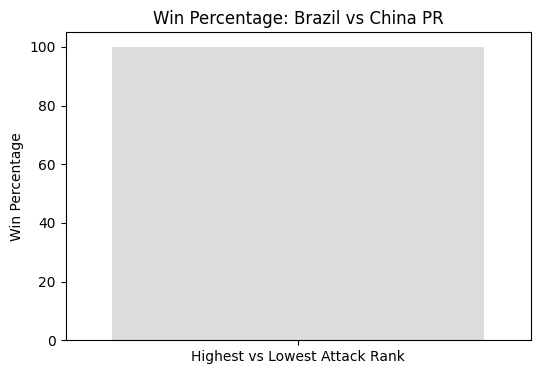

In [68]:
# Attack rank based on goals scored
goals_scored = wc_all_matches.groupby('home_team')['home_score'].sum() + wc_all_matches.groupby('away_team')['away_score'].sum()
attack_rank = goals_scored.rank(ascending=False)

# Identify the highest and lowest attack rank teams
highest_attack = attack_rank.idxmin()
lowest_attack = attack_rank.idxmax()

# Filter matches between the highest and lowest attack rank teams
matches_attack = wc_all_matches[((wc_all_matches['home_team'] == highest_attack) & (wc_all_matches['away_team'] == lowest_attack)) |
                                ((wc_all_matches['home_team'] == lowest_attack) & (wc_all_matches['away_team'] == highest_attack))]

# Calculate winning percentage for the highest attack rank team
win_percentage_attack = (matches_attack['winning_team'] == highest_attack).mean() * 100

# Plot the result
plt.figure(figsize=(6, 4))
sns.barplot(x=['Highest vs Lowest Attack Rank'], y=[win_percentage_attack], palette='coolwarm')
plt.title(f'Win Percentage: {highest_attack} vs {lowest_attack}')
plt.ylabel('Win Percentage')
plt.show()


/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/2924648024.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  goals_scored = wc_all_matches.groupby('winning_team')['home_score', 'away_score'].sum().sum(axis=1)


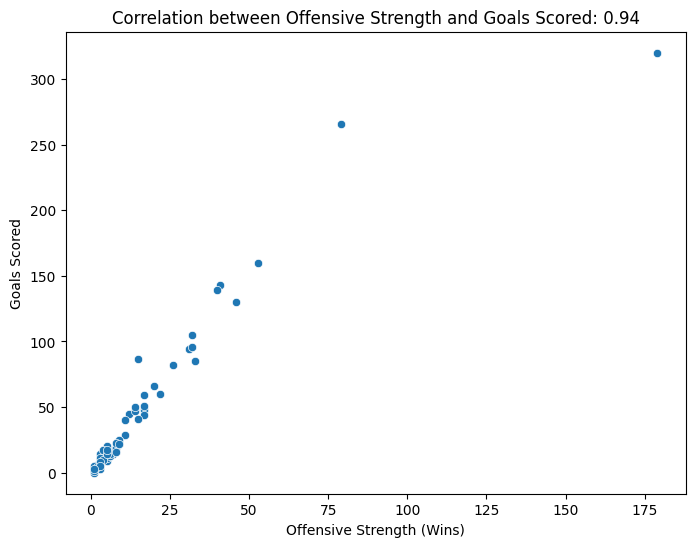

In [69]:
# Offensive score vs goals scored (goals scored per team)
goals_scored = wc_all_matches.groupby('winning_team')['home_score', 'away_score'].sum().sum(axis=1)
offensive_strength = team_wins  # Assuming wins represent offensive strength

# Correlation
correlation = offensive_strength.corr(goals_scored)

# Plot correlation using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=offensive_strength, y=goals_scored)
plt.title(f'Correlation between Offensive Strength and Goals Scored: {correlation:.2f}')
plt.xlabel('Offensive Strength (Wins)')
plt.ylabel('Goals Scored')
plt.show()


/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/4220871764.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_goalkeepers.index, y=best_goalkeepers.values, palette='coolwarm')


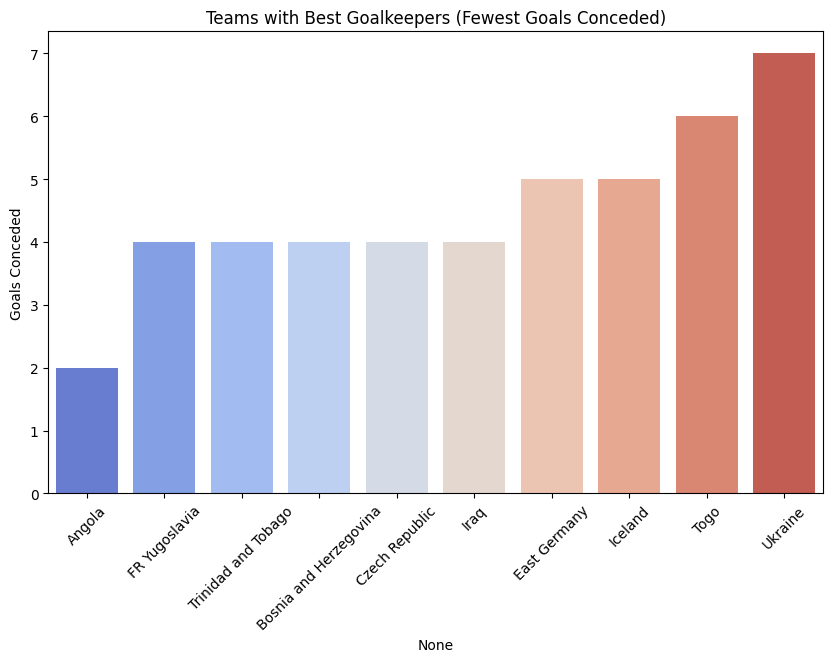

In [70]:
# Goals conceded by each team
goals_conceded = wc_all_matches.groupby('away_team')['home_score'].sum() + wc_all_matches.groupby('home_team')['away_score'].sum()

# Best goalkeepers (fewest goals conceded)
best_goalkeepers = goals_conceded.sort_values().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=best_goalkeepers.index, y=best_goalkeepers.values, palette='coolwarm')
plt.title('Teams with Best Goalkeepers (Fewest Goals Conceded)')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45)
plt.show()


/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/3277162435.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Win Streak', data=streak_df, palette='rocket')


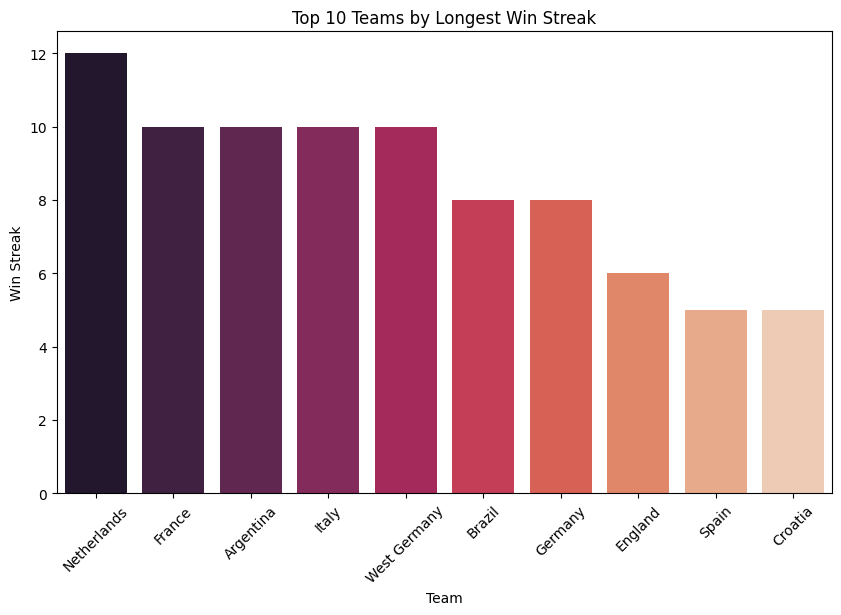

In [71]:
def calculate_win_streak(team_name):
    matches = wc_all_matches[(wc_all_matches['home_team'] == team_name) | (wc_all_matches['away_team'] == team_name)].sort_values('date')
    streak, max_streak = 0, 0
    for _, match in matches.iterrows():
        if match['winning_team'] == team_name:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

# Calculate win streak for all teams
win_streaks = {team: calculate_win_streak(team) for team in wc_all_matches['winning_team'].unique()}
top_10_win_streaks = sorted(win_streaks.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
streak_df = pd.DataFrame(top_10_win_streaks, columns=['Team', 'Win Streak'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Win Streak', data=streak_df, palette='rocket')
plt.title('Top 10 Teams by Longest Win Streak')
plt.xticks(rotation=45)
plt.ylabel('Win Streak')
plt.show()



/var/folders/sf/b796d0393b1crv53lwtk3hlr0000gn/T/ipykernel_46938/2178966060.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_win_percentage.index, y=top_15_win_percentage.values, palette='mako')


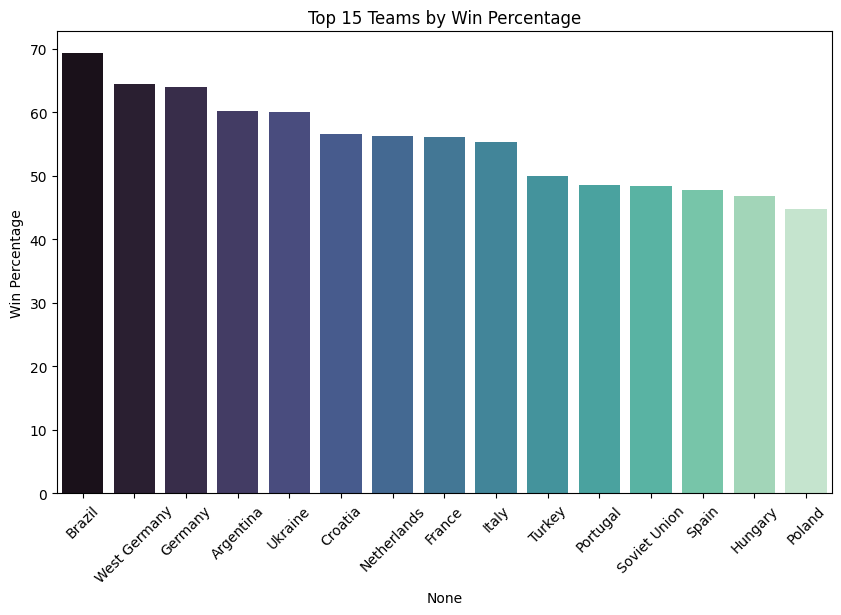

In [72]:
# Calculate total matches played by each team
total_matches_played = wc_all_matches['home_team'].value_counts() + wc_all_matches['away_team'].value_counts()

# Calculate win percentage
win_percentage = (team_wins / total_matches_played) * 100
top_15_win_percentage = win_percentage.sort_values(ascending=False).head(15)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_win_percentage.index, y=top_15_win_percentage.values, palette='mako')
plt.title('Top 15 Teams by Win Percentage')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()



Model Accuracy: 27.24%


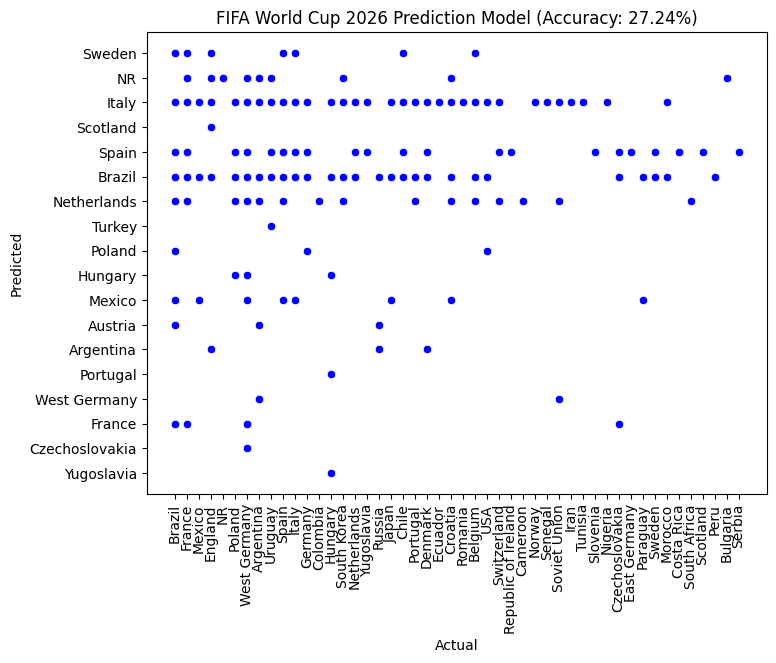

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = wc_all_matches[['home_score', 'away_score']]  # Add more features as needed
y = wc_all_matches['winning_team']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', marker="o")
plt.title(f'FIFA World Cup 2026 Prediction Model (Accuracy: {accuracy * 100:.2f}%)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=90)
plt.show()
